# Modelling and Evaluation Notebook

## Objectives

*   Answer business requirement 2: 
    * The client is interested to predict whether a given cherry leaf is healthy or infected.

* Augment images
* Save class indices
* Create model
* Fit model
* Evaluate model

## Inputs

* inputs/mildew-dataset/cherry-leaves/train
* inputs/mildew-dataset/cherry-leaves/test
* inputs/mildew-dataset/cherry-leaves/validation
* image shape embeddings

## Outputs
* Images distribution plot in train, validation, and test set.
* Image augmentation.
* Class indices to change prediction inference in labels.
* Machine learning model creation and training.
* Save model.
* Learning curve plot for model performance.
* Model evaluation on pickle file.
* Prediction on the random image file.

## Additional Comments | Insights | Conclusions

---

# Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

---

# Set Directories

  ## Set Working Directory

In [2]:
# Parent directory
parent_dir =  "/Users/marcelldemeter/GIT/CodeInstitute/ci-p5-mildew-detector"

# Change working directory to parent directory
os.chdir(parent_dir)
print (f"New working directory: {os.getcwd()} ")

New working directory: /Users/marcelldemeter/GIT/CodeInstitute/ci-p5-mildew-detector 


## Set Input Directory

In [3]:
dataset_dir = "inputs/mildew-dataset/cherry-leaves"
train_dir = os.path.join(parent_dir, dataset_dir, "train")
validation_dir = os.path.join(parent_dir, dataset_dir, "validation")
test_dir = os.path.join(parent_dir, dataset_dir, "test")

## Set Output Directory

In [4]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(parent_dir) and version in os.listdir(parent_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


In [5]:
file_path

'outputs/v1'

---

## Set Labels

In [6]:
# Set the labels
labels = os.listdir(train_dir)
print('Label for the images are', labels)

Label for the images are ['powdery_mildew', 'healthy']


## Set image shape

In [7]:
## Import saved image shape embedding
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

---

# Image Data Augmentation

### Image Data Generator

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Initialize ImageDataGenerator

In [9]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )


### Set Batch Size

In [10]:
batch_size = 20  # Set batch size

### Augment image datasets

In [11]:
# Train Set:
train_set = augmented_image_data.flow_from_directory(train_dir,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

# Validation Set:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(validation_dir,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

# Test Set:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )


train_set.class_indices
validation_set.class_indices
test_set.class_indices

Found 2944 images belonging to 2 classes.
Found 420 images belonging to 2 classes.
Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Save class_indices

In [12]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

---

# Model Creation

## ML Model

### Import Model Packages

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

### Model

In [14]:
def create_tf_model():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

### Model Summary

In [15]:
create_tf_model().summary()

/Users/marcelldemeter/GIT/CodeInstitute/ci-p5-mildew-detector/mildew-env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-11 21:45:02.469843: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-10-11 21:45:02.469879: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-10-11 21:45:02.469886: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.66 GB
2025-10-11 21:45:02.469904: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-11 21:45:02.469916: I tensorflow/core/common_r

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,429,377 (28.34 MB)

 Trainable params: 7,429,377 (28.34 MB)

 Non-trainable params: 0 (0.00 B)

### Early Stopping

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

## Fit Model for Model Training

In [17]:
model = create_tf_model()
model.fit(train_set,
          epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

Epoch 1/25


/Users/marcelldemeter/GIT/CodeInstitute/ci-p5-mildew-detector/mildew-env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-10-11 21:45:03.116194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


147/147 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.6628 - loss: 0.7684 - val_accuracy: 0.9214 - val_loss: 0.1892
Epoch 2/25
  1/147 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.7000 - loss: 0.5944

/Users/marcelldemeter/GIT/CodeInstitute/ci-p5-mildew-detector/mildew-env/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7000 - loss: 0.5944 - val_accuracy: 0.9310 - val_loss: 0.1849
Epoch 3/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - accuracy: 0.8235 - loss: 0.7480 - val_accuracy: 0.9714 - val_loss: 0.0622
Epoch 4/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0208 - val_accuracy: 0.9524 - val_loss: 0.0937
Epoch 5/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - accuracy: 0.9282 - loss: 0.2438 - val_accuracy: 0.9881 - val_loss: 0.0417
Epoch 6/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9500 - loss: 0.2639 - val_accuracy: 0.9881 - val_loss: 0.0502
Epoch 7/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step - accuracy: 0.9757 - loss: 0.0801 - val_accuracy: 0.9929 - val_loss: 0.0183
Epoch 8/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9952 - val_loss: 0.0245
Epoch 9/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step - accuracy: 0.9603 - loss: 0.1458 - val_accuracy: 0.997

### Save Model

In [18]:
model.save(f"{file_path}/mildew_detector_model_{version}.h5")

---

# Model Performance

## Model learning curve

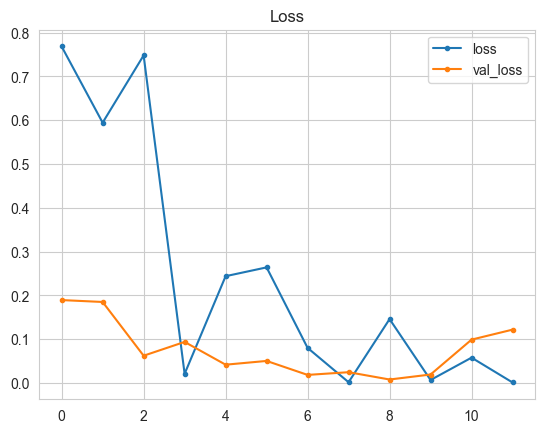

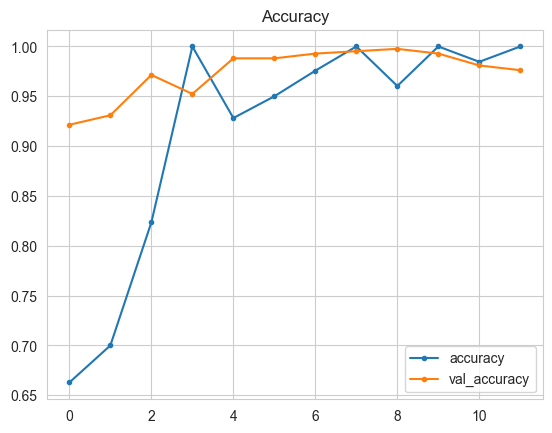

In [19]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()

## Model Evaluation

### Load saved model

In [20]:
from keras.models import load_model
model = load_model(f"{file_path}/mildew_detector_model_{version}.h5")

### Evaluate Model on Test Set

In [21]:
evaluation = model.evaluate(test_set)


/Users/marcelldemeter/GIT/CodeInstitute/ci-p5-mildew-detector/mildew-env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9858 - loss: 0.0753


Found 2944 images belonging to 2 classes.

=== Train Set ===
Confusion Matrix:
 [[1472    0]
 [  39 1433]]

Classification Report:
                precision    recall  f1-score   support

       healthy       0.97      1.00      0.99      1472
powdery_mildew       1.00      0.97      0.99      1472

      accuracy                           0.99      2944
     macro avg       0.99      0.99      0.99      2944
  weighted avg       0.99      0.99      0.99      2944


=== Validation Set ===
Confusion Matrix:
 [[210   0]
 [ 10 200]]

Classification Report:
                precision    recall  f1-score   support

       healthy       0.95      1.00      0.98       210
powdery_mildew       1.00      0.95      0.98       210

      accuracy                           0.98       420
     macro avg       0.98      0.98      0.98       420
  weighted avg       0.98      0.98      0.98       420


=== Test Set ===
Confusion Matrix:
 [[421   1]
 [ 11 411]]

Classification Report:
                p

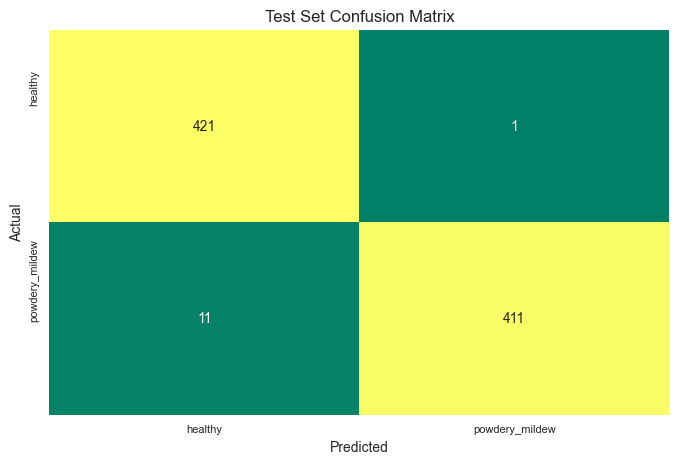

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# Non-shuffled copy of the train set for evaluation
train_eval = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_dir,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# --- Classification report ---
def generate_report(model, gen, name):
    """Print confusion matrix and classification report for a given dataset."""
    gen.reset()
    preds = model.predict(gen, verbose=0)

    # Handle sigmoid (N,1) or softmax (N,2)
    y_pred = np.argmax(preds, axis=1) if (preds.ndim == 2 and preds.shape[1] == 2) else (preds.ravel() >= 0.5).astype(int)
    y_true = gen.classes[:len(y_pred)]

    classes = [k for k, _ in sorted(gen.class_indices.items(), key=lambda kv: kv[1])]
    cm = confusion_matrix(y_true, y_pred)

    print(f"\n=== {name} Set ===")
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=classes))

    return cm, classes


# --- Confusion matrix plot ---
def plot_confusion_matrix(cm, classes, name="Dataset", cmap='summer'):
    """Plot and save a confusion matrix for dataset."""
    length = len(classes)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap=cmap, cbar=False, linewidths=0)
    plt.xticks(np.arange(length)+.5, classes, rotation=0, fontsize=8)
    plt.yticks(np.arange(length)+.3, classes, rotation=90, fontsize=8)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} Set Confusion Matrix")
    plt.savefig(f'{file_path}/confusion_matrix_{name.lower()}.png', bbox_inches='tight', dpi=150)
    plt.show()


# --- Run reports for all sets ---
cm_train, classes_train = generate_report(model, train_eval, "Train")
cm_val, classes_val = generate_report(model, validation_set, "Validation")
cm_test, classes_test = generate_report(model, test_set, "Test")

# --- Confusion Matrix Plot ---
plot_confusion_matrix(cm_test, classes_test, name="Test")


### Save Evaluation Pickle

In [23]:
joblib.dump(value=evaluation,
            filename=f"{file_path}/evaluation{version}.pkl")


['outputs/v1/evaluationv1.pkl']

In [24]:
cm_test, classes_test = generate_report(model, test_set, "Test")


=== Test Set ===
Confusion Matrix:
 [[421   1]
 [ 11 411]]

Classification Report:
                precision    recall  f1-score   support

       healthy       0.97      1.00      0.99       422
powdery_mildew       1.00      0.97      0.99       422

      accuracy                           0.99       844
     macro avg       0.99      0.99      0.99       844
  weighted avg       0.99      0.99      0.99       844

